In [9]:
# Establish the functionality for our assessment by bringing in the right packages
# Make sure to install these prior to mounting the packages 
# i.e. $ pip install pydotplus
# & visit http://www.graphviz.org/Download_macos.php

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import pydotplus as pdot
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.model_selection import train_test_split

%matplotlib inline

In [10]:
# Connect to the data source
myPredictionData = pd.read_csv(r"C:\Users\19723\Desktop\LinkedinLearning\The Data Scinece of Marketing\Exercise_Files\04_03\prediction-py.csv")

In [11]:
# Show column names for reference
myPredictionData.columns
myPredictionData.head(5)

,sales,sales_classification,capita,drive-by-traffic,complimentary-establishments,competition,weather,unemployment-rate,var1,var2,var3
0,"$73,966",0,785778,46364,6,0,4,0.48,5,1,22
1,"$96,116",1,1879898,35541,5,0,5,0.60,1,2,39
2,"$34,567",0,5383823,46529,3,0,5,0.68,2,3,37
3,"$61,291",0,1783055,52261,2,3,3,0.52,17,1,50
4,"$3,949",0,3485854,64184,11,1,4,0.63,1,2,23


In [12]:
# Set up our cross validation function

feature_cols = ['capita', 'competition', 'weather', 'var1', 'var2', 'var3' ]

train_X, test_X,  \
train_y, test_y = train_test_split( myPredictionData[feature_cols],
                                    myPredictionData['sales_classification'])

In [13]:
# Set up our depth list for our tree branches

depths_list = [2,3,4,5,6,7,8]

for depth in depths_list:
    clf_tree = DecisionTreeClassifier( max_depth = depth )
    clf_tree.fit( train_X, train_y )

In [14]:
# Specify the number of branches for our tree
clf_tree = DecisionTreeClassifier(max_depth = 8)

In [15]:
# Fit our training data to the x and to the y
clf_tree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=8)

In [16]:
# Apply our test data to our model 
tree_predict = clf_tree.predict( test_X)

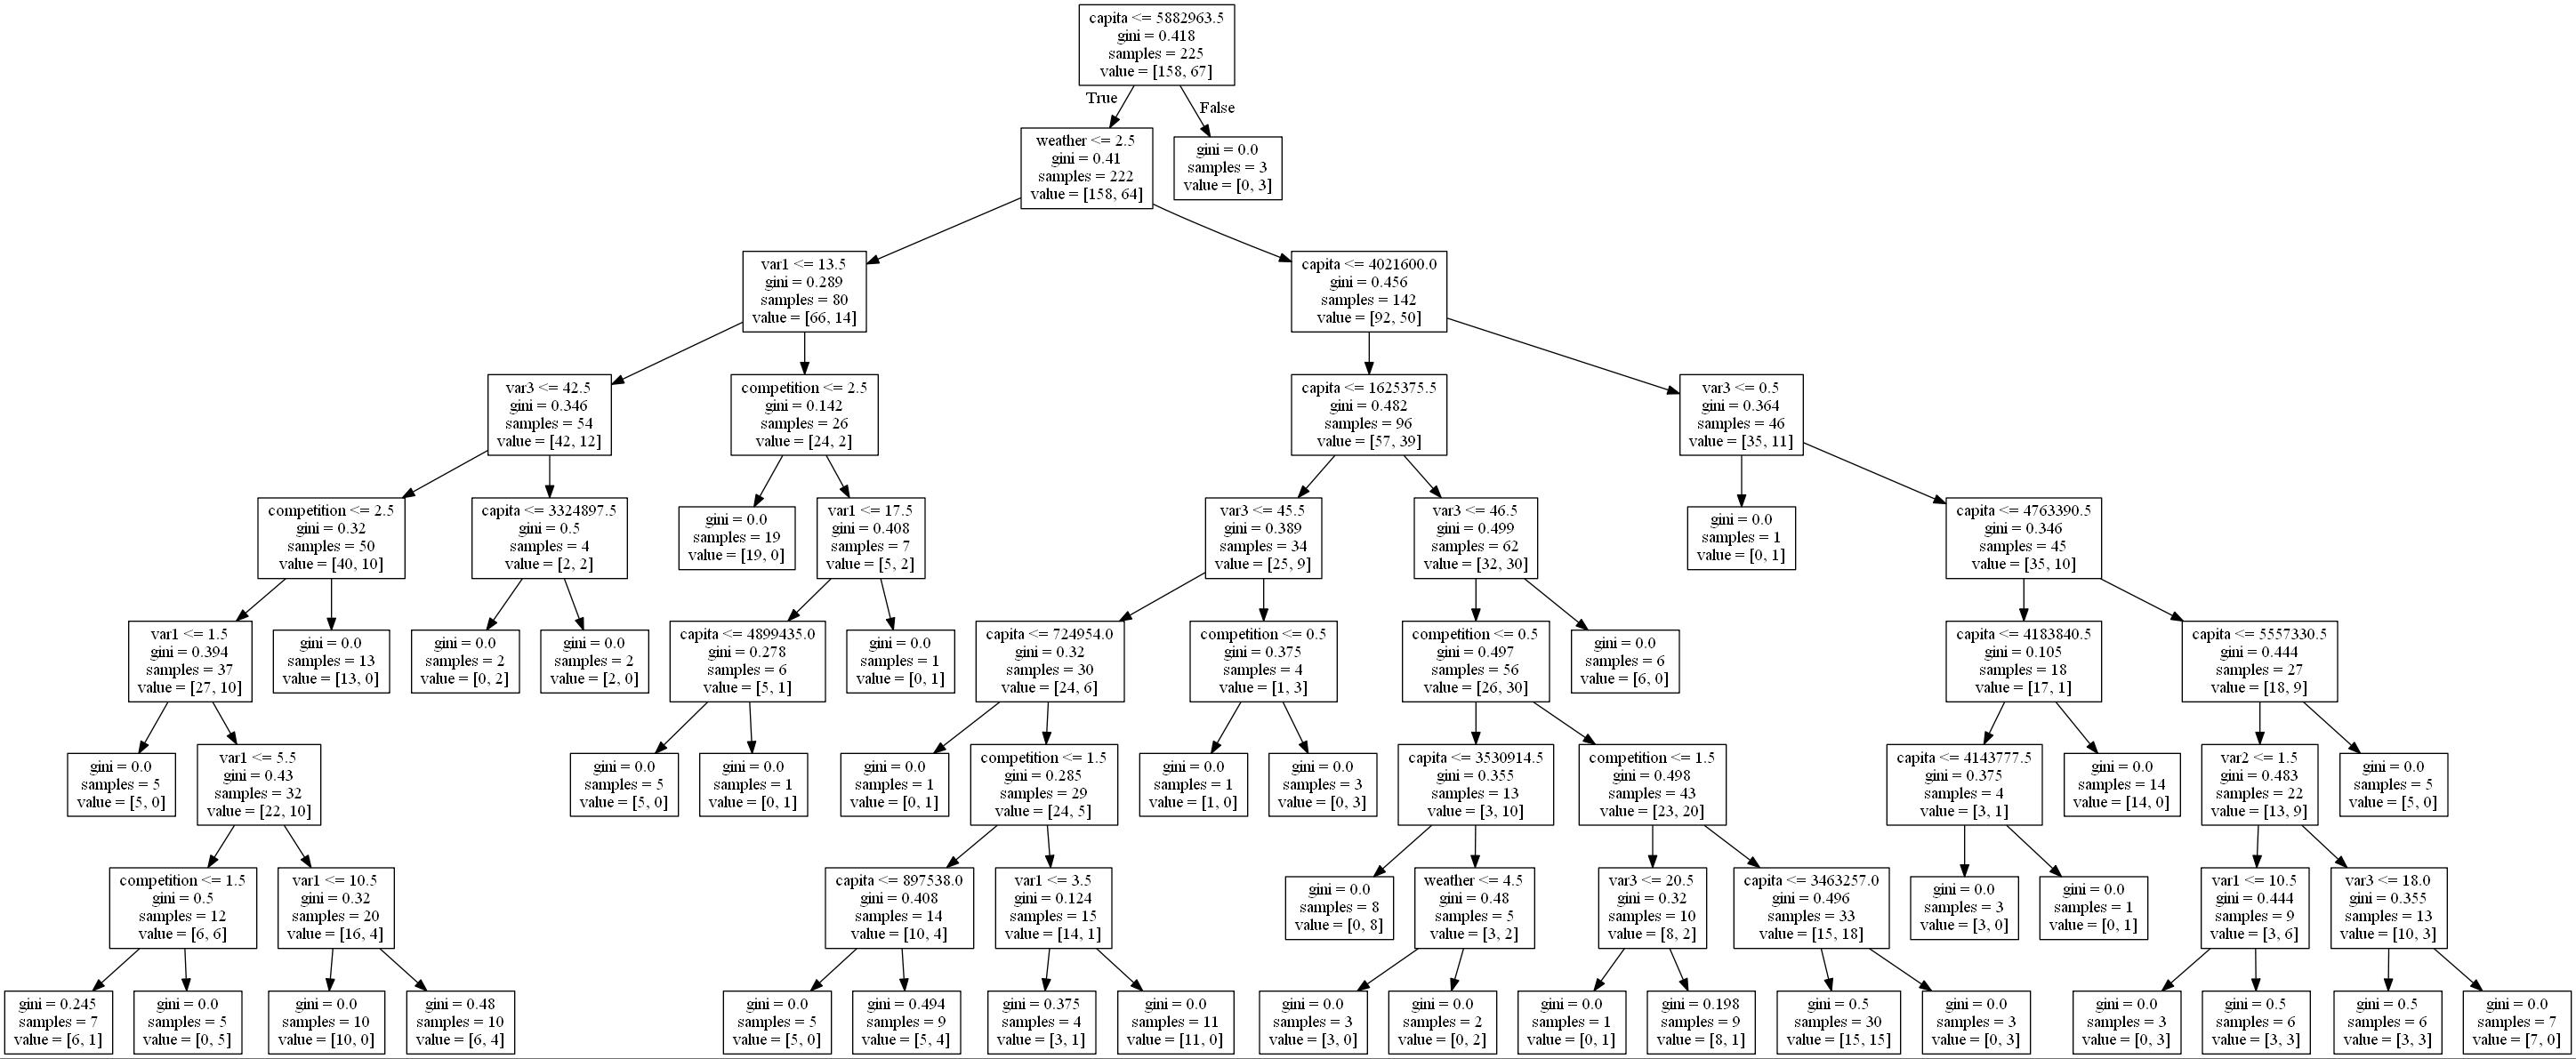

In [17]:
# Visualize our tree
export_graphviz( clf_tree,
                out_file = "model_tree.odt",
                feature_names = train_X.columns )
model_tree_graph = pdot.graphviz.graph_from_dot_file( 'model_tree.odt' )
model_tree_graph.write_jpg( 'model_tree.jpg' )

from IPython.display import Image
Image(filename='model_tree.jpg')